In [ ]:
'''
=>yahoo_finace_data
import yfinance as yf

data=yf.download('AAPL',start='2023-01-01,end='2024-09-30')
data.to_csv('yfin_data.csv')
'''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the dataset to understand its structure
y_fina=pd.read_csv("yfin_data.csv")

In [ ]:
#reviewing dataset information and first few data points
y_fina.info()
y_fina.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      457 non-null    object
 1   Adj Close  456 non-null    object
 2   Close      456 non-null    object
 3   High       456 non-null    object
 4   Low        456 non-null    object
 5   Open       456 non-null    object
 6   Volume     456 non-null    object
dtypes: object(7)
memory usage: 25.1+ KB


,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-02 00:00:00+00:00,88.48200225830078,88.48200225830078,88.4000015258789,87.15769958496094,87.15769958496094,0
3,2023-01-03 00:00:00+00:00,88.30000305175781,88.30000305175781,88.31300354003906,87.22599792480469,88.29199981689453,0
4,2023-01-04 00:00:00+00:00,87.21900177001953,87.21900177001953,87.9229965209961,87.21900177001953,87.21900177001953,0


In [ ]:
#dropping Frist two non-data col n changing price to date
y_fina=y_fina.iloc[2:,:]
y_fina.rename(columns={'Price': 'Date'}, inplace=True)
y_fina.head()

,Date,Adj Close,Close,High,Low,Open,Volume
2,2023-01-02 00:00:00+00:00,88.48200225830078,88.48200225830078,88.4000015258789,87.15769958496094,87.15769958496094,0
3,2023-01-03 00:00:00+00:00,88.30000305175781,88.30000305175781,88.31300354003906,87.22599792480469,88.29199981689453,0
4,2023-01-04 00:00:00+00:00,87.21900177001953,87.21900177001953,87.9229965209961,87.21900177001953,87.21900177001953,0
5,2023-01-05 00:00:00+00:00,87.6050033569336,87.6050033569336,87.80799865722656,86.75700378417969,87.58000183105469,0
6,2023-01-06 00:00:00+00:00,86.8270034790039,86.8270034790039,87.61499786376953,86.64700317382812,86.81900024414062,0


In [ ]:
# Convert columns to appropriate data types
y_fina['Date'] = pd.to_datetime(y_fina['Date'], errors='coerce')
y_fina.dropna(subset=['Date'], inplace=True)
for col in ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']:
    y_fina[col] = pd.to_numeric(y_fina[col], errors='coerce')
y_fina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 2 to 456
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       455 non-null    datetime64[ns, UTC]
 1   Adj Close  455 non-null    float64            
 2   Close      455 non-null    float64            
 3   High       455 non-null    float64            
 4   Low        455 non-null    float64            
 5   Open       455 non-null    float64            
 6   Volume     455 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 25.0 KB


In [ ]:
# Filter data up to September 30, 2024
end_date = '2024-09-30'
y_fina = y_fina[y_fina['Date'] <= end_date]
y_fina.set_index('Date', inplace=True)

In [ ]:
# Moving Average Calculation
oneday_MA_values = y_fina['Close'].rolling(window=1).mean()
oneday_MA = y_fina['Close'].rolling(window=1).mean().iloc[-1]
oneweek_MA_values = y_fina['Close'].rolling(window=7).mean()
oneweek_MA = y_fina['Close'].rolling(window=7).mean().iloc[-1]

print("One Day Moving Average Values:", oneday_MA)
print("One Week Moving Average Values:", oneweek_MA)

One Day Moving Average Values: 93.36799621582033
One Week Moving Average Values: 93.11528560093471


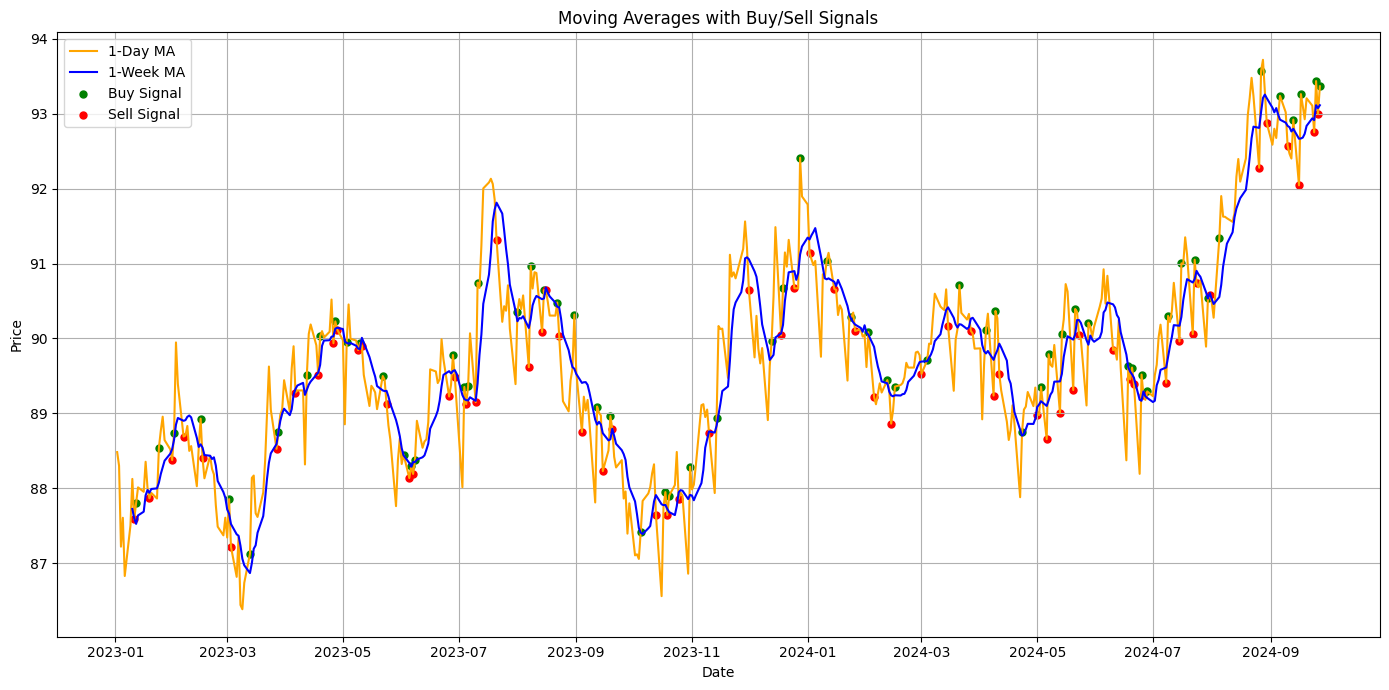

In [ ]:
#Identifying Buy and Sell Signals
buy_signals = (oneday_MA_values > oneweek_MA_values) & (oneday_MA_values.shift(1) <= oneweek_MA_values.shift(1))   #  Buy
sell_signals = (oneday_MA_values < oneweek_MA_values) & (oneday_MA_values.shift(1) >= oneweek_MA_values.shift(1))  # Sell

# Plotting
plt.figure(figsize=(14, 7))

# Plotting Moving Averages
plt.plot(y_fina.index, y_fina['Close'].rolling(window=1).mean(), label='1-Day MA', color='orange')
plt.plot(y_fina.index, y_fina['Close'].rolling(window=7).mean(), label='1-Week MA', color='blue')

# Highlighting Buy and Sell Signals
buy_dates = y_fina.index[buy_signals]
sell_dates = y_fina.index[sell_signals]

# Plotting Signals
plt.scatter(buy_dates, y_fina['Close'][buy_signals], marker='.', color='green', label='Buy Signal', s=100)
plt.scatter(sell_dates, y_fina['Close'][sell_signals], marker='.', color='red', label='Sell Signal', s=100)

# Adding titles and labels
plt.title('Moving Averages with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Bollinger Bands Calculation
#for 25 days
bollinger_window = 25
rolling_mean = y_fina['Close'].rolling(window=bollinger_window).mean()
rolling_std = y_fina['Close'].rolling(window=bollinger_window).std()
upper_band = (rolling_mean + (rolling_std * 2))
upper_band_value = (rolling_mean + (rolling_std * 2)).iloc[-1]
lower_band = (rolling_mean - (rolling_std * 2))
lower_band_value = (rolling_mean - (rolling_std * 2)).iloc[-1]
last_close = y_fina['Close'].iloc[-1]
print("Upper Bollinger Band:", upper_band_value)
print("Lower Bollinger Band:", lower_band_value)
print("Last Close Price:", last_close)

Upper Bollinger Band: 93.76600140609143
Lower Bollinger Band: 92.12528643570543
Last Close Price: 93.36799621582033


In [ ]:
#Identifying Buy and Sell Signals
buy_signals = (y_fina['Close'] < lower_band).astype(int)
sell_signals = (y_fina['Close'] > upper_band).astype(int)

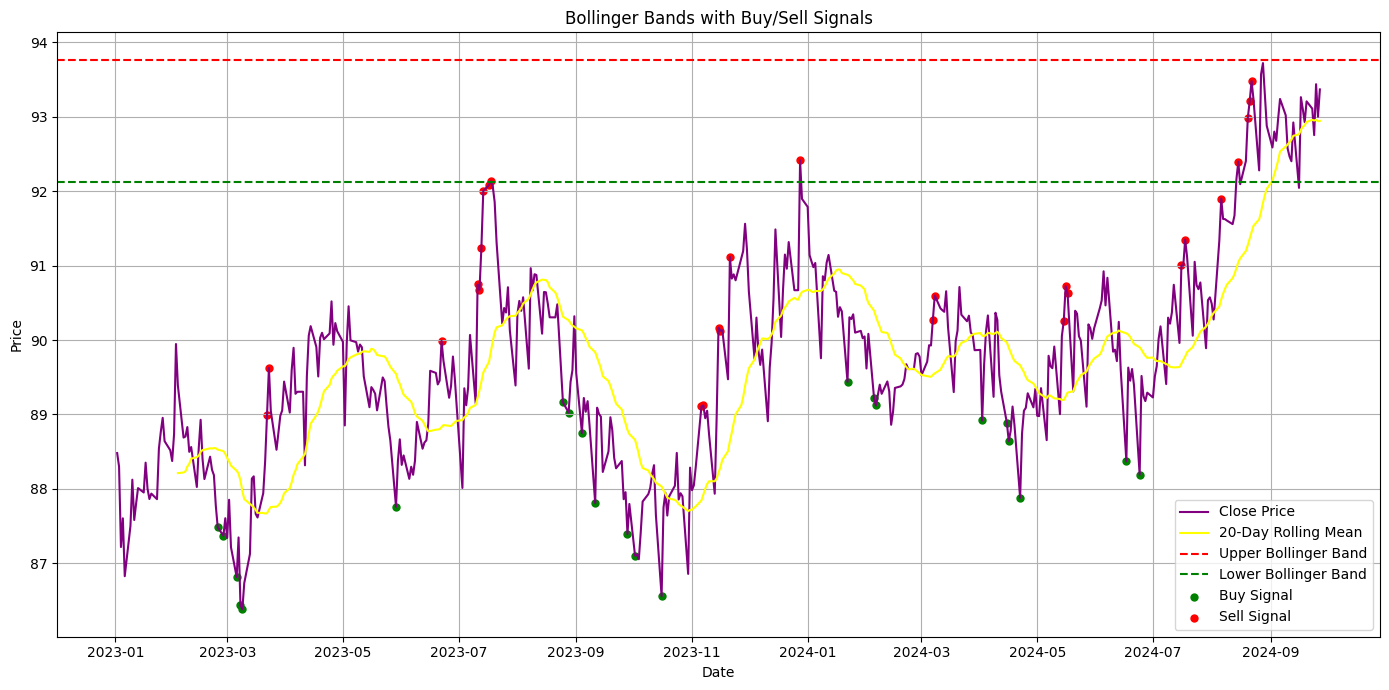

In [ ]:
# Plotting
plt.figure(figsize=(14, 7))

# Plotting Closing Prices and Bollinger Bands
plt.plot(y_fina['Close'], label='Close Price', color='purple')
plt.plot(rolling_mean, label='20-Day Rolling Mean', color='yellow')
plt.axhline(upper_band_value, color='red', linestyle='--', label='Upper Bollinger Band')
plt.axhline(lower_band_value, color='green', linestyle='--', label='Lower Bollinger Band')
# Highlighting Buy and Sell Signals
buy_dates = y_fina.index[buy_signals == 1]
sell_dates = y_fina.index[sell_signals == 1]

plt.scatter(buy_dates, y_fina['Close'][buy_signals == 1], marker='.', color='green', label='Buy Signal', s=100)
plt.scatter(sell_dates, y_fina['Close'][sell_signals == 1], marker='.', color='red', label='Sell Signal', s=100)

# Adding titles and labels
plt.title('Bollinger Bands with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#CCI Calculation
#typical_price
tp = (y_fina['High'] + y_fina['Low'] + y_fina['Close']) / 3
#Mean_price
mn_tp = tp.rolling(window=bollinger_window).mean()
#mean_deviation
mn_d = tp.rolling(window=bollinger_window).apply(lambda x: np.mean(np.abs(x - x.mean())), raw=True)
cci = ((tp - mn_tp) / (0.015 * mn_d))
cci_value = ((tp - mn_tp) / (0.015 * mn_d)).iloc[-1]
print("CCI Value:", cci_value)

CCI Value: 97.69248289311041


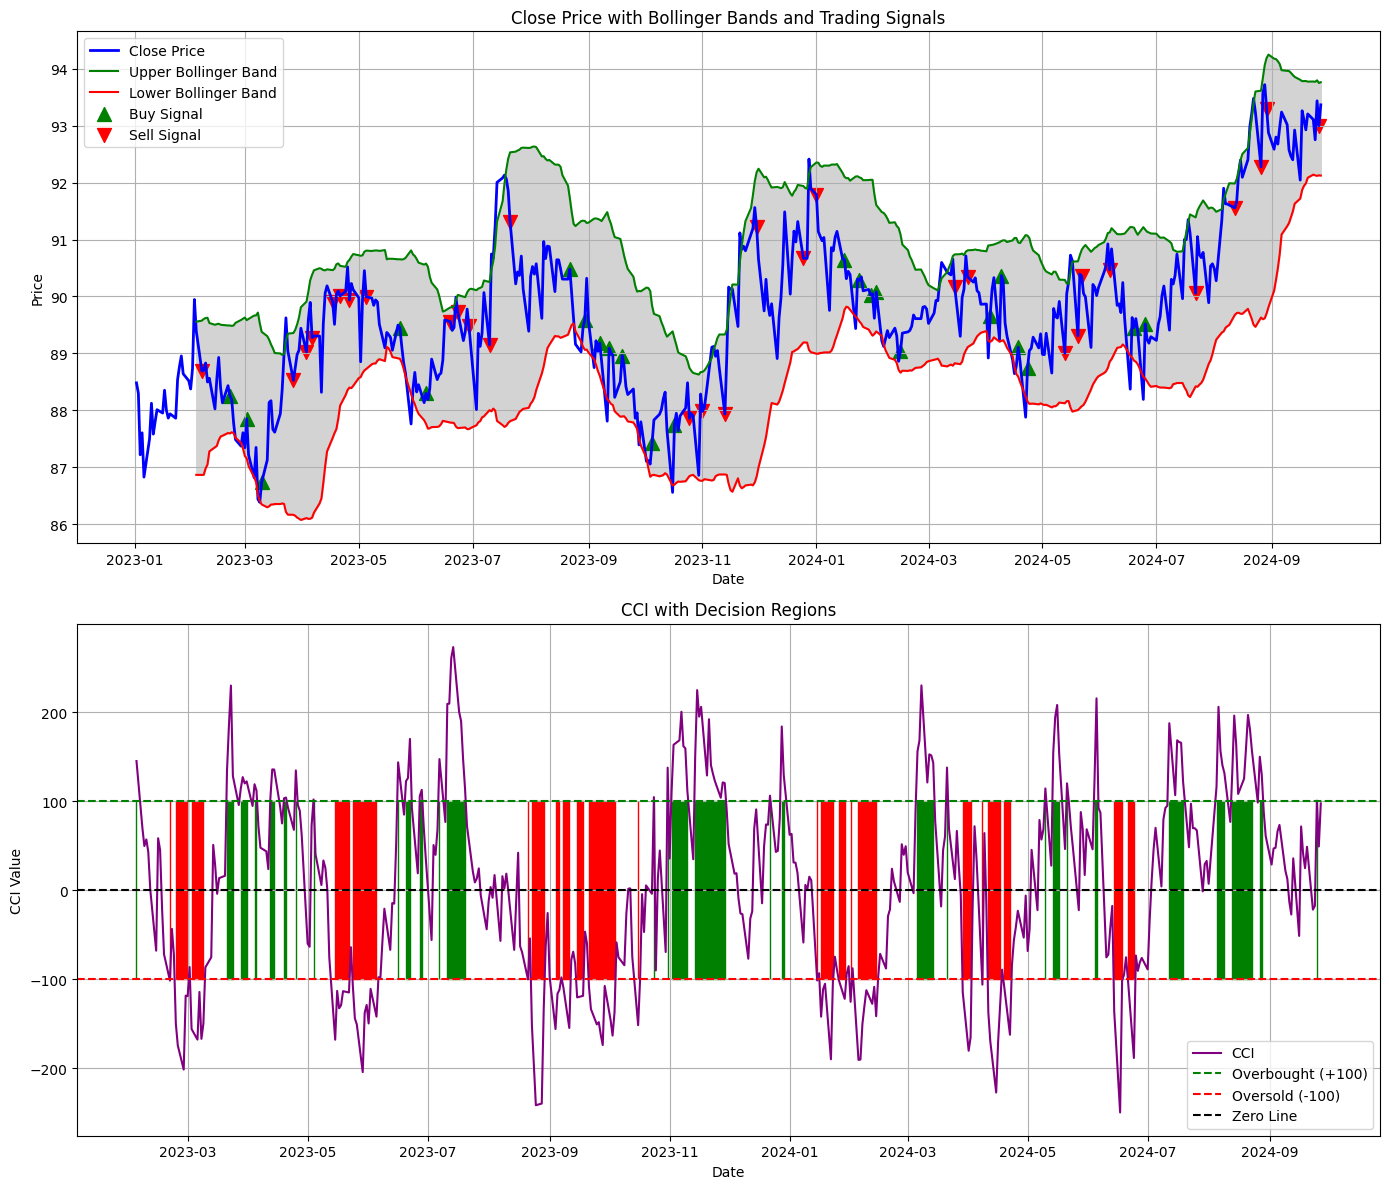

In [ ]:
# Identifing Buy and Sell Signals
buy_signals = (cci > -100) & (cci.shift(1) <= -100)  # CCI crosses above -100
sell_signals = (cci < 100) & (cci.shift(1) >= 100)   # CCI crosses below +100

# Plotting Closing Prices, Bollinger Bands, and CCI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Plot 1: Closing Prices and Bollinger Bands
ax1.plot(y_fina['Close'], label='Close Price', color='blue', linewidth=2)
ax1.plot(upper_band, label='Upper Bollinger Band', color='green')
ax1.plot(lower_band, label='Lower Bollinger Band', color='red')
ax1.fill_between(y_fina.index, lower_band, upper_band, color='lightgray')

# Highlighting Buy and Sell Signals on Closing Prices
ax1.scatter(y_fina.index[buy_signals], y_fina['Close'][buy_signals], marker='^', color='green', label='Buy Signal', s=100)
ax1.scatter(y_fina.index[sell_signals], y_fina['Close'][sell_signals], marker='v', color='red', label='Sell Signal', s=100)

ax1.set_title('Close Price with Bollinger Bands and Trading Signals')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid()

# Plot 2: CCI
ax2.plot(cci, label='CCI', color='purple')
ax2.axhline(100, color='green', linestyle='--', label='Overbought (+100)')
ax2.axhline(-100, color='red', linestyle='--', label='Oversold (-100)')
ax2.axhline(0, color='black', linestyle='--', label='Zero Line')

# Highlighting Decision Points
ax2.fill_between(cci.index, 100, -100, where=(cci > 100), color='green')  # Overbought
ax2.fill_between(cci.index, -100, 100, where=(cci < -100), color='red')  # Oversold

ax2.set_title('CCI with Decision Regions')
ax2.set_xlabel('Date')
ax2.set_ylabel('CCI Value')
ax2.legend()
ax2.grid()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
# Interpretation:
signals = {
    'Moving Average': 'BUY' if last_close > oneday_MA else 'SELL',
    'Bollinger Bands': 'BUY' if last_close < lower_band_value else 'SELL' if last_close > upper_band_value else 'NEUTRAL',
    'CCI': 'BUY' if cci_value < -100 else 'SELL' if cci_value > 100 else 'NEUTRAL'
}
print("Trading Signals:", signals)

Trading Signals: {'Moving Average': 'SELL', 'Bollinger Bands': 'NEUTRAL', 'CCI': 'NEUTRAL'}


In [ ]:
Trading_Signals = {
    'Indicator': ['Moving Average', 'Bollinger Bands', 'CCI'],
    'Signal': ['SELL', 'NEUTRAL', 'SELL']
}

# Create a DataFrame
Trading_Signals = pd.DataFrame(Trading_Signals)

# Display the table
print(Trading_Signals)

         Indicator   Signal
0   Moving Average     SELL
1  Bollinger Bands  NEUTRAL
2              CCI     SELL


In [ ]:
Trading_Signals.style.set_table_styles()

,Indicator,Signal
0,Moving Average,SELL
1,Bollinger Bands,NEUTRAL
2,CCI,SELL
